# *Импорт модулей*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import sklearn

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn import linear_model

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

/home/baki/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# *Загрузка dataset*

#### link dataset https://www.kaggle.com/blastchar/telco-customer-churn 

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

### Что внутри?

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 *«TotalChanges» присваивается тип «object», тогда как он должен иметь тип «float64»?*

In [5]:
df[(df.TotalCharges == " ")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Столбец 'Tenure' для этих записей равен 0, хотя столбец 'MonthlyCharges' не пуст. По всей видимости,это новые клиенты, которые пользуются услугами меньше месяца. Удалим эти строки.

In [6]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

'TotalCharges' имеет 11 пропущенных значений. Проверим эти данные.

In [7]:
df = df.dropna()

Удаление нулевых значений

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## EDA
- признаки
- зависимости
- визуализация

### 'MonthlyCharges'

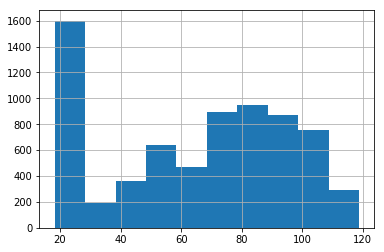

In [11]:
plt.figure(figsize=(6, 4))
df['MonthlyCharges'].hist()
plt.show()

Отношение колличества пользователей к их ежемесячнему платежу

In [12]:
df['MonthlyCharges'].mean()

64.79820819112632

Средняя цена ежемесячного платежа у пользователей

### 'PaymentMethod'

In [13]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

Способы оплаты клиентов

### Все числовые переменные

In [14]:
print(' Статистика числовых переменных: ')
df.describe().T

 Статистика числовых переменных: 


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


- Пользователи, которые больше всех пользуются услугами компании - 6 лет (72 месяца).
- Значения ежемесячных и общих расходов 

## Все категориальные переменные

In [15]:
print('Cтатистика категориальных переменных: : ')
df.describe(include='object').T


Cтатистика категориальных переменных: : 


,count,unique,top,freq
customerID,7032,7032,0454-OKRCT,1
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


По полученным данным можно сделать вывод: 
- Средний потребитель - молодой мужчина 
- Без партнера и иждивенцев 
- Имеющий только одну телефонную линию 
- Оптоволоконный доступ в интернет
- Без интернет-услуг
- Ежемесячный контракт 
- Безбумажный биллинг с электронным чеком. 
- Однозначных атрибутов нет

###  'gender'

In [16]:
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

Пользователей мужчин, больше чем женщнин

### 'tenure'

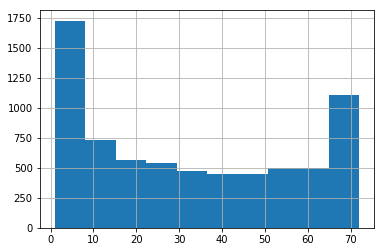

In [17]:
plt.figure(figsize=(6, 4))
df['tenure'].hist()
plt.show()

Какое колличество месяцев, клиент пользовался услугами данной компании

### 'customerID '

In [18]:
df['customerID'].value_counts()

0454-OKRCT    1
2082-OJVTK    1
5208-HFSBT    1
5748-RNCJT    1
2039-JONDJ    1
             ..
4395-PZMSN    1
9927-DSWDF    1
1757-TCATG    1
5180-UCIIQ    1
4190-MFLUW    1
Name: customerID, Length: 7032, dtype: int64

Проверили уникальность ID клиентов, интереса нет (дропаем)

### 'SeniorCitizen'

In [19]:
df['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

Возростной ли пользователь или нет?

### 'Partner'

In [20]:
df['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

Есть ли пара у пользователя?

### 'Dependents'

In [21]:
df['Dependents'].value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

Есть ли у пользователя иждивенцы?

### 'PhoneService'

In [22]:
df['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

Пользуется ли услугами телефона?

### 'MultipleLines'

In [23]:
df['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

Имеет ли пользователь многочисленные линии?

### 'InternetService'

In [24]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

Вид услуги доступа к интернету

### 'OnlineSecurity'

In [25]:
df['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

Пользуется ли услугой безопасности?

### 'OnlineBackup'

In [26]:
df['OnlineBackup'].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

Пользуется ли услугой резервной копией?

### 'DeviceProtection'

In [27]:
df['OnlineBackup'].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

Пользуется ли услугой защитой устройства?

### 'TechSupport'

In [28]:
df['TechSupport'].value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

Пользуется ли услугой поддержки?

### 'StreamingTV'

In [29]:
df['StreamingTV'].value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

Пользуется ли услугой телевидения?

### 'StreamingMovies'

In [30]:
df['StreamingMovies'].value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

Пользуется ли услугой просмотра фильмов?


### 'Contract'

In [31]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

Контрактный срок пользователя

### 'PaperlessBilling'

In [32]:
df['PaperlessBilling'].value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

Есть ли у клиента биллинг?

### Зависимая переменная 'churn'

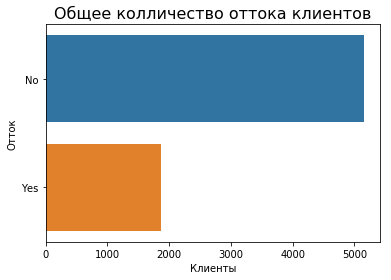

In [33]:
sns.countplot(data=df, y="Churn")
plt.title('Общее колличество оттока клиентов', fontsize=16)
plt.xlabel('Клиенты')
plt.ylabel('Отток')
plt.show()

In [34]:
print('Количество зависимых переменных: : ')
df.Churn.value_counts()/df.shape[0] * 100

Количество зависимых переменных: : 


No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

*В этом наборе данных только 26% пользователей являются оттоком, а чуть более 73% - нет.*

## Вывод по EDA

- Датасет содердит информацию о 7043 клиентов
- Каждый клиент уникален
- Данные на клиентов
- Группа переменных содержит только категориальные переменные. Большинство из них имеет три класса.
- Как долго они пользуюся данными услугами
- Какой вид оплаты
- Контрактный срок пользователя
- Какой отток клиентов
- Какой ежимесяцный платеж и общий остаток

## 2. Preprocessing
- почистим данные
- добавим новые признаки

In [35]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


*"customerID" не требуется*

### Кодирование категориальных переменных в числовые 

In [36]:
for a in df.columns:
    if df[a].dtype=='object':
        le = LabelEncoder()
        le.fit(list(df[a].values))
        df[a] = le.transform(df[a].values)
             

In [37]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1
7042,1,0,0,0,66,1,0,1,2,0,2,2,2,2,2,1,0,105.65,6844.50,0


In [38]:
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

In [39]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [41]:
def distplot(feature, frame, color='b'):
    plt.figure(figsize=(6,4))
    plt.title("Распространение для {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)


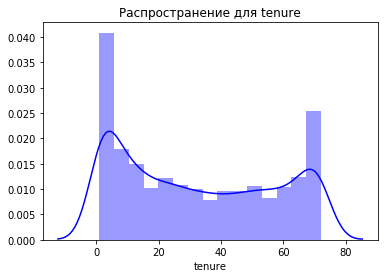

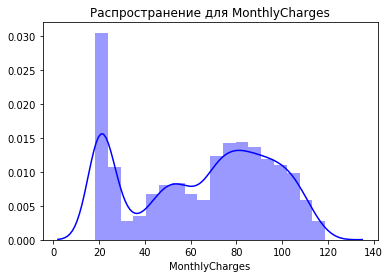

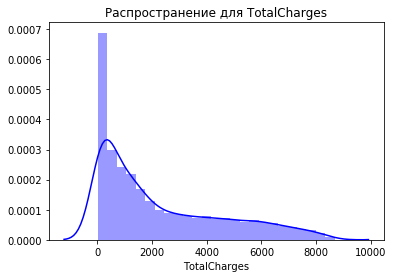

In [42]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

- Числовые характеристики распределены по разным диапазонам значений
- Нужно использовать стандартный скаляр
- Уменьшим до одного и того же диапазона. 

### Стандартизация

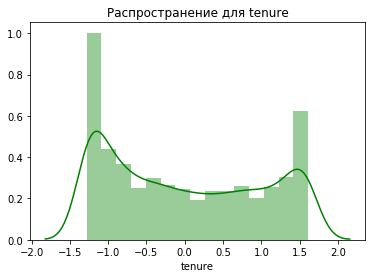

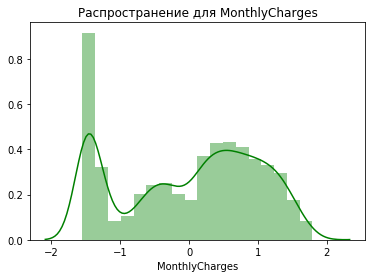

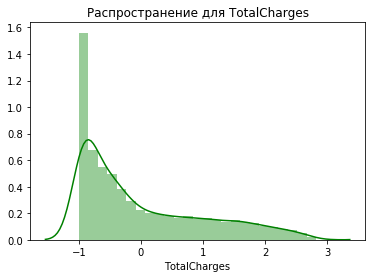

In [43]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in num_cols: distplot(feat, df_std, color='G')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


## 3. Бустинг

In [45]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1
7042,1,0,0,0,66,1,0,1,2,0,2,2,2,2,2,1,0,105.65,6844.50,0


### XGBoost

In [46]:
from xgboost import XGBClassifier

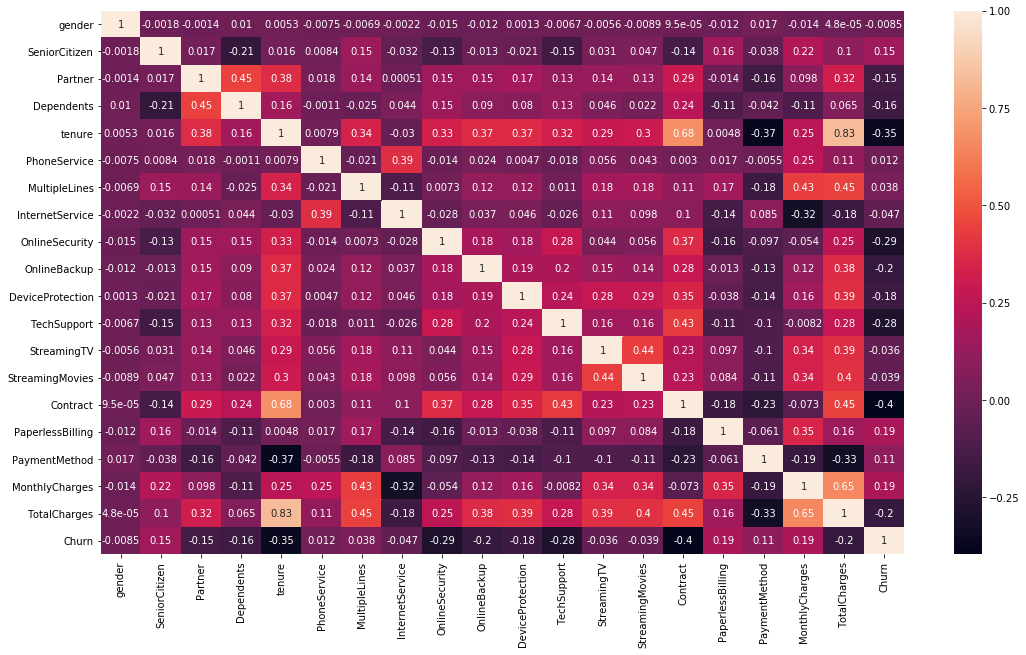

In [47]:
plt.figure(figsize = (18,10))
sns.heatmap(df.corr(), annot =True)

Основной график корреляции, чтобы понимать, какие характеристики согласованы

In [48]:
X = df[['Contract', 'tenure', 'TechSupport', 'OnlineSecurity', 'TotalCharges', 'PaperlessBilling',
       'DeviceProtection', 'Dependents', 'OnlineBackup', 'SeniorCitizen', 'MonthlyCharges',
       'PaymentMethod', 'Partner', 'PhoneService']] #только нужные колонны
y = df['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [49]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier
xgb =XGBClassifier(eval_metric = 'auc', use_label_encoder=False, objective = 'binary:logistic')


#параметры для xgboost

params_xgb = {'n_estimators': [100,400,800], 'learning_rate': [0.3,0.5,1],
             'max_depth': [6,8,15]}
gs_xgb =  GridSearchCV(xgb, param_grid=params_xgb, cv=5)
gs_xgb.fit(X_train, y_train)
print("Наилучшие параметры для XGBoost:", gs_xgb.best_params_)


Наилучшие параметры для XGBoost: {'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 100}


In [50]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

X,y = make_classification(n_samples = 7000, n_features=14,random_state = 10)
print(X.shape, y.shape)

(7000, 14) (7000,)


In [51]:
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

[05:27:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:27:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:27:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:27:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

### Scikit-Learn

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
X,y = make_classification(n_samples = 7000, n_features=14,random_state = 42)
print(X.shape, y.shape)

(7000, 14) (7000,)


Набор данных классификации

In [54]:
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise')
model.fit(X, y)

pred = model.predict(X)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.978 (0.003)


### LightGBM

In [55]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [56]:
X,y = make_classification(n_samples = 7000, n_features=14,random_state = 42)
print(X.shape, y.shape)

(7000, 14) (7000,)


Определяем наши данные

In [57]:
import catboost as ctb 
model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise')
model.fit(X, y)

pred = model.predict(X)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.983 (0.002)


### CatBoost

In [58]:
import catboost as cb
from catboost import CatBoostClassifier


In [59]:
X,y = make_classification(n_samples = 7000, n_features=14,random_state = 42)
print(X.shape, y.shape)

(7000, 14) (7000,)


In [60]:
model = CatBoostClassifier(verbose=0, n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise')
model.fit(X, y)

pred = model.predict(X)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.981 (0.002)


### Вывод: лидирует пока *XGBoost*

### Оптимизация Scikit-Learn, XGBoost, LightGBM и CatBoost

In [95]:
import numpy as np
import xgboost as xgb
import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification



### Scikit-Learn

In [96]:
def auc(m, X_train, X_test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(X_train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(X_test)[:,1]))

In [ ]:
model = GradientBoostingClassifier()

sklearn_params = {'n_estimators': 100, 'max_depth': 15, "learning_rate":  0.1 }

model = GradientBoostingClassifier(**sklearn_params).fit(X, y)

model.fit(X_train,y_train)
auc(model, X_train, X_test)

### XGboost

In [69]:
def auc(m, X_train, X_test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(X_train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(X_test)[:,1]))

In [111]:
model = xgb.XGBClassifier()
param_dist = {"max_depth": [6,8,15],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}
grid_search = GridSearchCV(model, param_grid=param_dist, cv = 3, 
                                   verbose=10, n_jobs=-1)

Настройка параметров

In [112]:
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

model = xgb.XGBClassifier(max_depth=15, min_child_weight=1,  n_estimators=100,\
                          n_jobs=-1 , verbose=1,learning_rate=0.16)
model.fit(X_train,y_train)

auc(model, X_train, X_test)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3; 1/27] START learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200
[05:52:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3; 1/27] END learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200;, score=0.800 total time=   0.8s
[CV 2/3; 1/27] START learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200
[05:52:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3; 1/27] END learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200;, score=0.797 total time=   0.7s
[CV 3/3; 

[CV 3/3; 6/27] END learning_rate=0.05, max_depth=8, min_child_weight=6, n_estimators=200;, score=0.799 total time=   1.1s
[CV 1/3; 7/27] START learning_rate=0.05, max_depth=15, min_child_weight=1, n_estimators=200
[05:52:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3; 7/27] END learning_rate=0.05, max_depth=15, min_child_weight=1, n_estimators=200;, score=0.782 total time=   2.3s
[CV 2/3; 7/27] START learning_rate=0.05, max_depth=15, min_child_weight=1, n_estimators=200
[05:52:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3; 7/27] END learning_rate=0.05, max_depth=15, min_child_weig

[CV 3/3; 12/27] END learning_rate=0.1, max_depth=6, min_child_weight=6, n_estimators=200;, score=0.810 total time=   1.3s
[CV 1/3; 13/27] START learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=200
[05:53:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3; 13/27] END learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=200;, score=0.785 total time=   1.3s
[CV 2/3; 13/27] START learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=200
[05:53:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3; 13/27] END learning_rate=0.1, max_depth=8, min_child_weight=1

[CV 3/3; 18/27] END learning_rate=0.1, max_depth=15, min_child_weight=6, n_estimators=200;, score=0.794 total time=   2.1s
[CV 1/3; 19/27] START learning_rate=0.16, max_depth=6, min_child_weight=1, n_estimators=200
[05:53:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3; 19/27] END learning_rate=0.16, max_depth=6, min_child_weight=1, n_estimators=200;, score=0.794 total time=   0.9s
[CV 2/3; 19/27] START learning_rate=0.16, max_depth=6, min_child_weight=1, n_estimators=200
[05:53:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3; 19/27] END learning_rate=0.16, max_depth=6, min_child_wei

[CV 3/3; 24/27] END learning_rate=0.16, max_depth=8, min_child_weight=6, n_estimators=200;, score=0.797 total time=   1.0s
[CV 1/3; 25/27] START learning_rate=0.16, max_depth=15, min_child_weight=1, n_estimators=200
[05:54:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3; 25/27] END learning_rate=0.16, max_depth=15, min_child_weight=1, n_estimators=200;, score=0.775 total time=   2.3s
[CV 2/3; 25/27] START learning_rate=0.16, max_depth=15, min_child_weight=1, n_estimators=200
[05:54:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3; 25/27] END learning_rate=0.16, max_depth=15, min_child

(0.9997100909407467, 0.8109084696978326)

### LightGBM

In [131]:
from sklearn import metrics

def auc2(m, X_train, X_test): 
    return (metrics.roc_auc_score(y_train,m.predict(X_train)),
                            metrics.roc_auc_score(y_test,m.predict(X_test)))

lg = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [6,8,15],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [100]
             }
# Настройка параметров
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

d_train = lgb.Dataset(X_train, label=y_train)
params = {"max_depth": 15, "learning_rate" : 0.1, "num_leaves": 900,  "n_estimators": 100}


model2 = lgb.train(params, d_train)
auc2(model2, X_train, X_test)


SyntaxError: invalid syntax (<ipython-input-131-6ad0e6eca3ad>, line 25)

### CatBoost

In [128]:
import catboost as ctb

In [130]:

def auc(m, X_train, X_test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(X_train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(X_test)[:,1]))

params = {'depth': [6,8,10],
          'learning_rate' : [0.03, 0.1, 0.15],
          'l2_leaf_reg': [1,4,9],
          'iterations': [100]}
# Настройка параметров
cb = ctb.CatBoostClassifier()
ctb_model = GridSearchCV(cb, params, scoring="roc_auc", cv = 3)
ctb_model.fit(X_train, y_train)
cb = ctb.CatBoostClassifier(eval_metric="AUC", depth=4, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)
cb.fit(X_train,y_train)
auc(cb, X_train, X_test)



0:	learn: 0.6811853	total: 1.42ms	remaining: 140ms
1:	learn: 0.6705279	total: 2.56ms	remaining: 125ms
2:	learn: 0.6596715	total: 7.08ms	remaining: 229ms
3:	learn: 0.6488661	total: 13ms	remaining: 311ms
4:	learn: 0.6387386	total: 14.3ms	remaining: 271ms
5:	learn: 0.6296626	total: 15.6ms	remaining: 245ms
6:	learn: 0.6205615	total: 16.9ms	remaining: 225ms
7:	learn: 0.6116742	total: 18.3ms	remaining: 211ms
8:	learn: 0.6038119	total: 23.7ms	remaining: 240ms
9:	learn: 0.5959735	total: 24.9ms	remaining: 225ms
10:	learn: 0.5886656	total: 28.6ms	remaining: 231ms
11:	learn: 0.5816842	total: 29.9ms	remaining: 219ms
12:	learn: 0.5750433	total: 31.1ms	remaining: 208ms
13:	learn: 0.5682108	total: 32.3ms	remaining: 198ms
14:	learn: 0.5620095	total: 33.4ms	remaining: 189ms
15:	learn: 0.5560457	total: 34.6ms	remaining: 182ms
16:	learn: 0.5503713	total: 35.8ms	remaining: 175ms
17:	learn: 0.5447462	total: 40.4ms	remaining: 184ms
18:	learn: 0.5401884	total: 41.1ms	remaining: 175ms
19:	learn: 0.5349124	tot

94:	learn: 0.3953759	total: 103ms	remaining: 5.41ms
95:	learn: 0.3947609	total: 106ms	remaining: 4.43ms
96:	learn: 0.3942715	total: 107ms	remaining: 3.32ms
97:	learn: 0.3937108	total: 109ms	remaining: 2.21ms
98:	learn: 0.3932044	total: 110ms	remaining: 1.11ms
99:	learn: 0.3927946	total: 111ms	remaining: 0us
0:	learn: 0.6811141	total: 1.18ms	remaining: 116ms
1:	learn: 0.6706819	total: 2.06ms	remaining: 101ms
2:	learn: 0.6598661	total: 3.11ms	remaining: 100ms
3:	learn: 0.6497867	total: 4.19ms	remaining: 101ms
4:	learn: 0.6398034	total: 5.25ms	remaining: 99.7ms
5:	learn: 0.6308756	total: 6.33ms	remaining: 99.2ms
6:	learn: 0.6221726	total: 8.91ms	remaining: 118ms
7:	learn: 0.6133946	total: 9.96ms	remaining: 115ms
8:	learn: 0.6056037	total: 11ms	remaining: 111ms
9:	learn: 0.5980281	total: 12.3ms	remaining: 111ms
10:	learn: 0.5905615	total: 13.4ms	remaining: 109ms
11:	learn: 0.5836771	total: 14.6ms	remaining: 107ms
12:	learn: 0.5767654	total: 16.4ms	remaining: 110ms
13:	learn: 0.5704092	tota

33:	learn: 0.3864822	total: 42.8ms	remaining: 83ms
34:	learn: 0.3854848	total: 43.9ms	remaining: 81.4ms
35:	learn: 0.3840748	total: 45ms	remaining: 80ms
36:	learn: 0.3831568	total: 46.1ms	remaining: 78.4ms
37:	learn: 0.3821881	total: 54ms	remaining: 88.2ms
38:	learn: 0.3812546	total: 55.2ms	remaining: 86.3ms
39:	learn: 0.3801899	total: 56.4ms	remaining: 84.5ms
40:	learn: 0.3791121	total: 57.5ms	remaining: 82.7ms
41:	learn: 0.3782409	total: 58.6ms	remaining: 81ms
42:	learn: 0.3772211	total: 59.8ms	remaining: 79.3ms
43:	learn: 0.3760811	total: 61ms	remaining: 77.6ms
44:	learn: 0.3752541	total: 65.9ms	remaining: 80.6ms
45:	learn: 0.3745688	total: 67.3ms	remaining: 79ms
46:	learn: 0.3740133	total: 68.7ms	remaining: 77.4ms
47:	learn: 0.3733964	total: 70.1ms	remaining: 75.9ms
48:	learn: 0.3726870	total: 71.4ms	remaining: 74.3ms
49:	learn: 0.3717088	total: 72.6ms	remaining: 72.6ms
50:	learn: 0.3714212	total: 74.2ms	remaining: 71.3ms
51:	learn: 0.3706423	total: 75.4ms	remaining: 69.6ms
52:	lea

94:	learn: 0.3391373	total: 110ms	remaining: 5.8ms
95:	learn: 0.3385121	total: 111ms	remaining: 4.64ms
96:	learn: 0.3380101	total: 113ms	remaining: 3.48ms
97:	learn: 0.3375712	total: 114ms	remaining: 2.32ms
98:	learn: 0.3366439	total: 115ms	remaining: 1.16ms
99:	learn: 0.3363486	total: 116ms	remaining: 0us
0:	learn: 0.6343645	total: 1.16ms	remaining: 114ms
1:	learn: 0.5920683	total: 2.22ms	remaining: 109ms
2:	learn: 0.5571621	total: 3.45ms	remaining: 112ms
3:	learn: 0.5269226	total: 4.78ms	remaining: 115ms
4:	learn: 0.5036421	total: 7.86ms	remaining: 149ms
5:	learn: 0.4853239	total: 9.41ms	remaining: 147ms
6:	learn: 0.4704188	total: 10.7ms	remaining: 142ms
7:	learn: 0.4559829	total: 12.9ms	remaining: 148ms
8:	learn: 0.4446589	total: 14.4ms	remaining: 146ms
9:	learn: 0.4358510	total: 18.7ms	remaining: 169ms
10:	learn: 0.4277484	total: 20.1ms	remaining: 163ms
11:	learn: 0.4216788	total: 21.4ms	remaining: 157ms
12:	learn: 0.4154695	total: 22.6ms	remaining: 151ms
13:	learn: 0.4101471	total

35:	learn: 0.4862917	total: 40.4ms	remaining: 71.8ms
36:	learn: 0.4834854	total: 41.7ms	remaining: 71.1ms
37:	learn: 0.4809977	total: 46.4ms	remaining: 75.7ms
38:	learn: 0.4783732	total: 47.5ms	remaining: 74.3ms
39:	learn: 0.4758557	total: 48.7ms	remaining: 73ms
40:	learn: 0.4735114	total: 49.8ms	remaining: 71.7ms
41:	learn: 0.4713053	total: 51.1ms	remaining: 70.6ms
42:	learn: 0.4694285	total: 52.3ms	remaining: 69.3ms
43:	learn: 0.4675348	total: 54.7ms	remaining: 69.6ms
44:	learn: 0.4653416	total: 55.8ms	remaining: 68.2ms
45:	learn: 0.4632279	total: 58.5ms	remaining: 68.7ms
46:	learn: 0.4611949	total: 60ms	remaining: 67.6ms
47:	learn: 0.4596762	total: 61ms	remaining: 66.1ms
48:	learn: 0.4577175	total: 62.7ms	remaining: 65.2ms
49:	learn: 0.4563454	total: 64ms	remaining: 64ms
50:	learn: 0.4547005	total: 65.3ms	remaining: 62.8ms
51:	learn: 0.4530084	total: 66.6ms	remaining: 61.4ms
52:	learn: 0.4514488	total: 67.8ms	remaining: 60.1ms
53:	learn: 0.4500138	total: 69ms	remaining: 58.8ms
54:	l

85:	learn: 0.4251255	total: 109ms	remaining: 17.8ms
86:	learn: 0.4245101	total: 110ms	remaining: 16.5ms
87:	learn: 0.4239908	total: 111ms	remaining: 15.2ms
88:	learn: 0.4233785	total: 113ms	remaining: 13.9ms
89:	learn: 0.4231031	total: 113ms	remaining: 12.6ms
90:	learn: 0.4225297	total: 114ms	remaining: 11.3ms
91:	learn: 0.4218841	total: 116ms	remaining: 10ms
92:	learn: 0.4213282	total: 117ms	remaining: 8.78ms
93:	learn: 0.4208175	total: 118ms	remaining: 7.52ms
94:	learn: 0.4203305	total: 119ms	remaining: 6.26ms
95:	learn: 0.4198277	total: 124ms	remaining: 5.17ms
96:	learn: 0.4193062	total: 130ms	remaining: 4.02ms
97:	learn: 0.4188168	total: 131ms	remaining: 2.67ms
98:	learn: 0.4184612	total: 132ms	remaining: 1.34ms
99:	learn: 0.4181635	total: 133ms	remaining: 0us
0:	learn: 0.6580592	total: 1.33ms	remaining: 132ms
1:	learn: 0.6288737	total: 2.34ms	remaining: 115ms
2:	learn: 0.6018779	total: 3.5ms	remaining: 113ms
3:	learn: 0.5786409	total: 4.7ms	remaining: 113ms
4:	learn: 0.5601583	tot

34:	learn: 0.4112060	total: 41ms	remaining: 76.1ms
35:	learn: 0.4099605	total: 42.5ms	remaining: 75.6ms
36:	learn: 0.4085022	total: 43.7ms	remaining: 74.4ms
37:	learn: 0.4076867	total: 44.8ms	remaining: 73ms
38:	learn: 0.4067021	total: 46ms	remaining: 71.9ms
39:	learn: 0.4058227	total: 47.1ms	remaining: 70.6ms
40:	learn: 0.4048867	total: 48.2ms	remaining: 69.3ms
41:	learn: 0.4040929	total: 49.4ms	remaining: 68.2ms
42:	learn: 0.4035728	total: 50.1ms	remaining: 66.4ms
43:	learn: 0.4030423	total: 51.2ms	remaining: 65.2ms
44:	learn: 0.4021735	total: 52.7ms	remaining: 64.4ms
45:	learn: 0.4015597	total: 53.9ms	remaining: 63.3ms
46:	learn: 0.4008643	total: 55.3ms	remaining: 62.3ms
47:	learn: 0.4002247	total: 56.5ms	remaining: 61.2ms
48:	learn: 0.3996493	total: 57.7ms	remaining: 60.1ms
49:	learn: 0.3993494	total: 58.7ms	remaining: 58.7ms
50:	learn: 0.3987116	total: 59.9ms	remaining: 57.6ms
51:	learn: 0.3982073	total: 61.1ms	remaining: 56.4ms
52:	learn: 0.3978121	total: 62.3ms	remaining: 55.3ms

89:	learn: 0.3512440	total: 106ms	remaining: 11.7ms
90:	learn: 0.3506990	total: 107ms	remaining: 10.6ms
91:	learn: 0.3504967	total: 108ms	remaining: 9.39ms
92:	learn: 0.3500361	total: 109ms	remaining: 8.22ms
93:	learn: 0.3497022	total: 111ms	remaining: 7.06ms
94:	learn: 0.3490958	total: 115ms	remaining: 6.06ms
95:	learn: 0.3489200	total: 116ms	remaining: 4.85ms
96:	learn: 0.3484600	total: 118ms	remaining: 3.64ms
97:	learn: 0.3482599	total: 119ms	remaining: 2.42ms
98:	learn: 0.3479075	total: 120ms	remaining: 1.21ms
99:	learn: 0.3475553	total: 121ms	remaining: 0us
0:	learn: 0.6418823	total: 1.37ms	remaining: 136ms
1:	learn: 0.6036385	total: 2.33ms	remaining: 114ms
2:	learn: 0.5693755	total: 3.65ms	remaining: 118ms
3:	learn: 0.5448674	total: 4.9ms	remaining: 118ms
4:	learn: 0.5241291	total: 6.12ms	remaining: 116ms
5:	learn: 0.5070845	total: 7.36ms	remaining: 115ms
6:	learn: 0.4927969	total: 8.7ms	remaining: 116ms
7:	learn: 0.4789806	total: 9.88ms	remaining: 114ms
8:	learn: 0.4690240	total

39:	learn: 0.4803625	total: 45.1ms	remaining: 67.6ms
40:	learn: 0.4778956	total: 46.2ms	remaining: 66.5ms
41:	learn: 0.4755432	total: 47.3ms	remaining: 65.3ms
42:	learn: 0.4731534	total: 48.5ms	remaining: 64.3ms
43:	learn: 0.4708073	total: 49.5ms	remaining: 63ms
44:	learn: 0.4688547	total: 50.6ms	remaining: 61.9ms
45:	learn: 0.4666959	total: 51.7ms	remaining: 60.7ms
46:	learn: 0.4646344	total: 52.9ms	remaining: 59.6ms
47:	learn: 0.4624711	total: 53.9ms	remaining: 58.4ms
48:	learn: 0.4608185	total: 55.1ms	remaining: 57.4ms
49:	learn: 0.4591570	total: 62.2ms	remaining: 62.2ms
50:	learn: 0.4572276	total: 63.5ms	remaining: 61ms
51:	learn: 0.4555058	total: 64.6ms	remaining: 59.6ms
52:	learn: 0.4538197	total: 65.8ms	remaining: 58.3ms
53:	learn: 0.4521489	total: 66.9ms	remaining: 57ms
54:	learn: 0.4508755	total: 68ms	remaining: 55.7ms
55:	learn: 0.4493002	total: 69.2ms	remaining: 54.4ms
56:	learn: 0.4478698	total: 70.4ms	remaining: 53.1ms
57:	learn: 0.4464094	total: 71.9ms	remaining: 52ms
58:

96:	learn: 0.3813542	total: 117ms	remaining: 3.61ms
97:	learn: 0.3810719	total: 118ms	remaining: 2.4ms
98:	learn: 0.3807914	total: 120ms	remaining: 1.21ms
99:	learn: 0.3806379	total: 121ms	remaining: 0us
0:	learn: 0.6614576	total: 1.21ms	remaining: 120ms
1:	learn: 0.6310851	total: 2.08ms	remaining: 102ms
2:	learn: 0.6048572	total: 3.15ms	remaining: 102ms
3:	learn: 0.5832090	total: 4.22ms	remaining: 101ms
4:	learn: 0.5638676	total: 5.29ms	remaining: 100ms
5:	learn: 0.5487033	total: 11.4ms	remaining: 178ms
6:	learn: 0.5346376	total: 12.7ms	remaining: 169ms
7:	learn: 0.5203571	total: 14.1ms	remaining: 162ms
8:	learn: 0.5101694	total: 15.4ms	remaining: 156ms
9:	learn: 0.4998733	total: 16.7ms	remaining: 150ms
10:	learn: 0.4907820	total: 18ms	remaining: 146ms
11:	learn: 0.4828396	total: 19.8ms	remaining: 145ms
12:	learn: 0.4747761	total: 21.1ms	remaining: 141ms
13:	learn: 0.4671968	total: 22.3ms	remaining: 137ms
14:	learn: 0.4603843	total: 23.5ms	remaining: 133ms
15:	learn: 0.4547035	total: 

97:	learn: 0.3870400	total: 169ms	remaining: 3.45ms
98:	learn: 0.3869318	total: 170ms	remaining: 1.72ms
99:	learn: 0.3867586	total: 173ms	remaining: 0us
0:	learn: 0.6478911	total: 1.22ms	remaining: 121ms
1:	learn: 0.6148013	total: 5.18ms	remaining: 254ms
2:	learn: 0.5813288	total: 6.42ms	remaining: 208ms
3:	learn: 0.5561374	total: 7.66ms	remaining: 184ms
4:	learn: 0.5352666	total: 8.84ms	remaining: 168ms
5:	learn: 0.5163507	total: 10.1ms	remaining: 157ms
6:	learn: 0.5013077	total: 11.3ms	remaining: 150ms
7:	learn: 0.4873628	total: 12.6ms	remaining: 145ms
8:	learn: 0.4741559	total: 13.8ms	remaining: 140ms
9:	learn: 0.4642420	total: 15.7ms	remaining: 141ms
10:	learn: 0.4558969	total: 20.5ms	remaining: 166ms
11:	learn: 0.4492278	total: 21.7ms	remaining: 159ms
12:	learn: 0.4437570	total: 27.7ms	remaining: 185ms
13:	learn: 0.4380802	total: 29ms	remaining: 178ms
14:	learn: 0.4337972	total: 30.3ms	remaining: 171ms
15:	learn: 0.4300679	total: 31.6ms	remaining: 166ms
16:	learn: 0.4265416	total:

57:	learn: 0.3913648	total: 71.5ms	remaining: 51.8ms
58:	learn: 0.3906341	total: 72.7ms	remaining: 50.5ms
59:	learn: 0.3899869	total: 73.8ms	remaining: 49.2ms
60:	learn: 0.3894004	total: 74.9ms	remaining: 47.9ms
61:	learn: 0.3889184	total: 76ms	remaining: 46.6ms
62:	learn: 0.3884541	total: 77.2ms	remaining: 45.3ms
63:	learn: 0.3882503	total: 78.2ms	remaining: 44ms
64:	learn: 0.3881131	total: 79.4ms	remaining: 42.8ms
65:	learn: 0.3876816	total: 80.7ms	remaining: 41.6ms
66:	learn: 0.3872053	total: 86.9ms	remaining: 42.8ms
67:	learn: 0.3867614	total: 88.1ms	remaining: 41.5ms
68:	learn: 0.3863050	total: 89.2ms	remaining: 40.1ms
69:	learn: 0.3861021	total: 90.4ms	remaining: 38.8ms
70:	learn: 0.3855730	total: 91.8ms	remaining: 37.5ms
71:	learn: 0.3852472	total: 92.9ms	remaining: 36.1ms
72:	learn: 0.3847075	total: 94.7ms	remaining: 35ms
73:	learn: 0.3843561	total: 96.1ms	remaining: 33.8ms
74:	learn: 0.3839254	total: 98ms	remaining: 32.7ms
75:	learn: 0.3835005	total: 99.9ms	remaining: 31.6ms
7

77:	learn: 0.3933393	total: 209ms	remaining: 59ms
78:	learn: 0.3923390	total: 212ms	remaining: 56.4ms
79:	learn: 0.3913831	total: 216ms	remaining: 54ms
80:	learn: 0.3904356	total: 219ms	remaining: 51.3ms
81:	learn: 0.3896416	total: 221ms	remaining: 48.5ms
82:	learn: 0.3888197	total: 230ms	remaining: 47.2ms
83:	learn: 0.3879842	total: 233ms	remaining: 44.4ms
84:	learn: 0.3875246	total: 237ms	remaining: 41.9ms
85:	learn: 0.3867346	total: 244ms	remaining: 39.7ms
86:	learn: 0.3858727	total: 247ms	remaining: 36.9ms
87:	learn: 0.3849414	total: 251ms	remaining: 34.2ms
88:	learn: 0.3845316	total: 252ms	remaining: 31.1ms
89:	learn: 0.3838642	total: 256ms	remaining: 28.5ms
90:	learn: 0.3830759	total: 259ms	remaining: 25.6ms
91:	learn: 0.3823379	total: 261ms	remaining: 22.7ms
92:	learn: 0.3815575	total: 264ms	remaining: 19.9ms
93:	learn: 0.3807245	total: 268ms	remaining: 17.1ms
94:	learn: 0.3805242	total: 269ms	remaining: 14.2ms
95:	learn: 0.3797096	total: 271ms	remaining: 11.3ms
96:	learn: 0.379

42:	learn: 0.3660048	total: 123ms	remaining: 162ms
43:	learn: 0.3636546	total: 125ms	remaining: 160ms
44:	learn: 0.3626250	total: 133ms	remaining: 162ms
45:	learn: 0.3612663	total: 136ms	remaining: 159ms
46:	learn: 0.3600461	total: 138ms	remaining: 156ms
47:	learn: 0.3591093	total: 141ms	remaining: 153ms
48:	learn: 0.3580781	total: 144ms	remaining: 149ms
49:	learn: 0.3565997	total: 146ms	remaining: 146ms
50:	learn: 0.3558233	total: 149ms	remaining: 143ms
51:	learn: 0.3552313	total: 159ms	remaining: 147ms
52:	learn: 0.3541259	total: 167ms	remaining: 148ms
53:	learn: 0.3530673	total: 179ms	remaining: 152ms
54:	learn: 0.3529974	total: 180ms	remaining: 147ms
55:	learn: 0.3515009	total: 183ms	remaining: 144ms
56:	learn: 0.3503884	total: 186ms	remaining: 140ms
57:	learn: 0.3491867	total: 197ms	remaining: 143ms
58:	learn: 0.3478569	total: 203ms	remaining: 141ms
59:	learn: 0.3466220	total: 206ms	remaining: 138ms
60:	learn: 0.3456273	total: 214ms	remaining: 137ms
61:	learn: 0.3450698	total: 224

52:	learn: 0.3613523	total: 192ms	remaining: 170ms
53:	learn: 0.3603122	total: 199ms	remaining: 170ms
54:	learn: 0.3594350	total: 206ms	remaining: 168ms
55:	learn: 0.3584002	total: 212ms	remaining: 167ms
56:	learn: 0.3573953	total: 215ms	remaining: 162ms
57:	learn: 0.3561110	total: 220ms	remaining: 159ms
58:	learn: 0.3549930	total: 222ms	remaining: 154ms
59:	learn: 0.3539761	total: 227ms	remaining: 151ms
60:	learn: 0.3530555	total: 230ms	remaining: 147ms
61:	learn: 0.3516422	total: 239ms	remaining: 147ms
62:	learn: 0.3506406	total: 242ms	remaining: 142ms
63:	learn: 0.3498845	total: 247ms	remaining: 139ms
64:	learn: 0.3488234	total: 250ms	remaining: 135ms
65:	learn: 0.3480525	total: 255ms	remaining: 132ms
66:	learn: 0.3467397	total: 261ms	remaining: 129ms
67:	learn: 0.3455870	total: 271ms	remaining: 128ms
68:	learn: 0.3449194	total: 277ms	remaining: 124ms
69:	learn: 0.3440588	total: 282ms	remaining: 121ms
70:	learn: 0.3429402	total: 289ms	remaining: 118ms
71:	learn: 0.3422601	total: 292

74:	learn: 0.2972880	total: 200ms	remaining: 66.8ms
75:	learn: 0.2961523	total: 203ms	remaining: 64ms
76:	learn: 0.2954298	total: 205ms	remaining: 61.2ms
77:	learn: 0.2946377	total: 207ms	remaining: 58.4ms
78:	learn: 0.2933264	total: 210ms	remaining: 55.7ms
79:	learn: 0.2929169	total: 222ms	remaining: 55.6ms
80:	learn: 0.2920638	total: 225ms	remaining: 52.7ms
81:	learn: 0.2913863	total: 227ms	remaining: 49.8ms
82:	learn: 0.2904760	total: 231ms	remaining: 47.4ms
83:	learn: 0.2900185	total: 234ms	remaining: 44.6ms
84:	learn: 0.2893104	total: 236ms	remaining: 41.7ms
85:	learn: 0.2889489	total: 239ms	remaining: 38.8ms
86:	learn: 0.2884341	total: 241ms	remaining: 36ms
87:	learn: 0.2872761	total: 243ms	remaining: 33.2ms
88:	learn: 0.2865687	total: 251ms	remaining: 31ms
89:	learn: 0.2855162	total: 254ms	remaining: 28.2ms
90:	learn: 0.2849815	total: 256ms	remaining: 25.4ms
91:	learn: 0.2844709	total: 259ms	remaining: 22.5ms
92:	learn: 0.2838180	total: 261ms	remaining: 19.7ms
93:	learn: 0.28296

59:	learn: 0.4428496	total: 255ms	remaining: 170ms
60:	learn: 0.4414757	total: 262ms	remaining: 168ms
61:	learn: 0.4402739	total: 267ms	remaining: 164ms
62:	learn: 0.4389319	total: 273ms	remaining: 161ms
63:	learn: 0.4375029	total: 274ms	remaining: 154ms
64:	learn: 0.4361985	total: 281ms	remaining: 151ms
65:	learn: 0.4349437	total: 286ms	remaining: 147ms
66:	learn: 0.4336506	total: 287ms	remaining: 142ms
67:	learn: 0.4323296	total: 290ms	remaining: 136ms
68:	learn: 0.4313055	total: 296ms	remaining: 133ms
69:	learn: 0.4302797	total: 301ms	remaining: 129ms
70:	learn: 0.4292552	total: 309ms	remaining: 126ms
71:	learn: 0.4281128	total: 314ms	remaining: 122ms
72:	learn: 0.4275327	total: 317ms	remaining: 117ms
73:	learn: 0.4263447	total: 319ms	remaining: 112ms
74:	learn: 0.4255339	total: 320ms	remaining: 107ms
75:	learn: 0.4245166	total: 326ms	remaining: 103ms
76:	learn: 0.4234328	total: 329ms	remaining: 98.1ms
77:	learn: 0.4224105	total: 333ms	remaining: 94ms
78:	learn: 0.4214658	total: 336

25:	learn: 0.5258621	total: 100ms	remaining: 286ms
26:	learn: 0.5225967	total: 103ms	remaining: 278ms
27:	learn: 0.5187172	total: 105ms	remaining: 270ms
28:	learn: 0.5151799	total: 107ms	remaining: 262ms
29:	learn: 0.5119418	total: 112ms	remaining: 262ms
30:	learn: 0.5084641	total: 115ms	remaining: 255ms
31:	learn: 0.5053059	total: 117ms	remaining: 249ms
32:	learn: 0.5024504	total: 120ms	remaining: 244ms
33:	learn: 0.4995409	total: 128ms	remaining: 248ms
34:	learn: 0.4968891	total: 133ms	remaining: 247ms
35:	learn: 0.4943453	total: 136ms	remaining: 242ms
36:	learn: 0.4916456	total: 139ms	remaining: 236ms
37:	learn: 0.4887067	total: 141ms	remaining: 230ms
38:	learn: 0.4866843	total: 142ms	remaining: 222ms
39:	learn: 0.4843578	total: 145ms	remaining: 217ms
40:	learn: 0.4825684	total: 150ms	remaining: 216ms
41:	learn: 0.4799816	total: 157ms	remaining: 217ms
42:	learn: 0.4776089	total: 159ms	remaining: 211ms
43:	learn: 0.4755958	total: 165ms	remaining: 210ms
44:	learn: 0.4737558	total: 167

98:	learn: 0.3472983	total: 271ms	remaining: 2.74ms
99:	learn: 0.3464692	total: 273ms	remaining: 0us
0:	learn: 0.6570511	total: 6.27ms	remaining: 621ms
1:	learn: 0.6260659	total: 7.2ms	remaining: 353ms
2:	learn: 0.6009145	total: 10.1ms	remaining: 325ms
3:	learn: 0.5754623	total: 11.8ms	remaining: 282ms
4:	learn: 0.5564194	total: 14.1ms	remaining: 269ms
5:	learn: 0.5408155	total: 16.6ms	remaining: 260ms
6:	learn: 0.5267784	total: 19.1ms	remaining: 253ms
7:	learn: 0.5133925	total: 22.4ms	remaining: 257ms
8:	learn: 0.5009102	total: 24.8ms	remaining: 251ms
9:	learn: 0.4898498	total: 26.3ms	remaining: 236ms
10:	learn: 0.4799821	total: 28.5ms	remaining: 231ms
11:	learn: 0.4709421	total: 30.8ms	remaining: 226ms
12:	learn: 0.4633215	total: 32.9ms	remaining: 220ms
13:	learn: 0.4568247	total: 35.1ms	remaining: 215ms
14:	learn: 0.4500777	total: 37.2ms	remaining: 211ms
15:	learn: 0.4436964	total: 38.4ms	remaining: 202ms
16:	learn: 0.4389324	total: 40.6ms	remaining: 198ms
17:	learn: 0.4331612	total

0:	learn: 0.6417119	total: 1.61ms	remaining: 160ms
1:	learn: 0.6022695	total: 2.53ms	remaining: 124ms
2:	learn: 0.5700773	total: 5.51ms	remaining: 178ms
3:	learn: 0.5446263	total: 7.54ms	remaining: 181ms
4:	learn: 0.5245693	total: 10.5ms	remaining: 199ms
5:	learn: 0.5066858	total: 13.7ms	remaining: 215ms
6:	learn: 0.4910037	total: 16.1ms	remaining: 214ms
7:	learn: 0.4775567	total: 19.4ms	remaining: 223ms
8:	learn: 0.4670955	total: 21.7ms	remaining: 220ms
9:	learn: 0.4577928	total: 22.8ms	remaining: 205ms
10:	learn: 0.4507076	total: 25ms	remaining: 203ms
11:	learn: 0.4429942	total: 27.3ms	remaining: 201ms
12:	learn: 0.4361580	total: 29.5ms	remaining: 197ms
13:	learn: 0.4307784	total: 31.6ms	remaining: 194ms
14:	learn: 0.4253945	total: 33.8ms	remaining: 192ms
15:	learn: 0.4203401	total: 35.9ms	remaining: 188ms
16:	learn: 0.4163455	total: 38ms	remaining: 186ms
17:	learn: 0.4124295	total: 40ms	remaining: 182ms
18:	learn: 0.4114313	total: 40.6ms	remaining: 173ms
19:	learn: 0.4083632	total: 

26:	learn: 0.3976831	total: 61.2ms	remaining: 166ms
27:	learn: 0.3957781	total: 63.5ms	remaining: 163ms
28:	learn: 0.3938426	total: 67.8ms	remaining: 166ms
29:	learn: 0.3926633	total: 70ms	remaining: 163ms
30:	learn: 0.3912149	total: 72.3ms	remaining: 161ms
31:	learn: 0.3899591	total: 81.6ms	remaining: 173ms
32:	learn: 0.3888379	total: 85.9ms	remaining: 174ms
33:	learn: 0.3871680	total: 88.7ms	remaining: 172ms
34:	learn: 0.3859447	total: 91ms	remaining: 169ms
35:	learn: 0.3847741	total: 93.3ms	remaining: 166ms
36:	learn: 0.3833889	total: 95.7ms	remaining: 163ms
37:	learn: 0.3822189	total: 98.8ms	remaining: 161ms
38:	learn: 0.3812029	total: 101ms	remaining: 158ms
39:	learn: 0.3799708	total: 103ms	remaining: 155ms
40:	learn: 0.3784007	total: 105ms	remaining: 152ms
41:	learn: 0.3771905	total: 108ms	remaining: 149ms
42:	learn: 0.3761225	total: 110ms	remaining: 146ms
43:	learn: 0.3752646	total: 114ms	remaining: 145ms
44:	learn: 0.3747436	total: 115ms	remaining: 141ms
45:	learn: 0.3734544	to

62:	learn: 0.4475185	total: 129ms	remaining: 75.5ms
63:	learn: 0.4460928	total: 130ms	remaining: 72.9ms
64:	learn: 0.4450727	total: 132ms	remaining: 70.9ms
65:	learn: 0.4434786	total: 133ms	remaining: 68.4ms
66:	learn: 0.4421443	total: 135ms	remaining: 66.5ms
67:	learn: 0.4412244	total: 140ms	remaining: 66ms
68:	learn: 0.4399668	total: 148ms	remaining: 66.3ms
69:	learn: 0.4389526	total: 150ms	remaining: 64.1ms
70:	learn: 0.4374372	total: 152ms	remaining: 62.1ms
71:	learn: 0.4362738	total: 159ms	remaining: 61.8ms
72:	learn: 0.4351937	total: 162ms	remaining: 60.1ms
73:	learn: 0.4342392	total: 165ms	remaining: 58.1ms
74:	learn: 0.4331282	total: 168ms	remaining: 55.9ms
75:	learn: 0.4319991	total: 169ms	remaining: 53.2ms
76:	learn: 0.4310035	total: 171ms	remaining: 51ms
77:	learn: 0.4300577	total: 173ms	remaining: 48.8ms
78:	learn: 0.4290685	total: 174ms	remaining: 46.2ms
79:	learn: 0.4281311	total: 176ms	remaining: 44ms
80:	learn: 0.4273884	total: 178ms	remaining: 41.8ms
81:	learn: 0.42646

90:	learn: 0.3704657	total: 213ms	remaining: 21ms
91:	learn: 0.3700895	total: 215ms	remaining: 18.7ms
92:	learn: 0.3695621	total: 217ms	remaining: 16.3ms
93:	learn: 0.3689831	total: 219ms	remaining: 14ms
94:	learn: 0.3682960	total: 221ms	remaining: 11.6ms
95:	learn: 0.3678764	total: 224ms	remaining: 9.31ms
96:	learn: 0.3675526	total: 231ms	remaining: 7.15ms
97:	learn: 0.3671408	total: 233ms	remaining: 4.76ms
98:	learn: 0.3666999	total: 239ms	remaining: 2.42ms
99:	learn: 0.3662944	total: 245ms	remaining: 0us
0:	learn: 0.6614576	total: 1.86ms	remaining: 184ms
1:	learn: 0.6309477	total: 2.65ms	remaining: 130ms
2:	learn: 0.6081588	total: 5.17ms	remaining: 167ms
3:	learn: 0.5853355	total: 6.74ms	remaining: 162ms
4:	learn: 0.5689530	total: 8.93ms	remaining: 170ms
5:	learn: 0.5536238	total: 11.1ms	remaining: 174ms
6:	learn: 0.5406473	total: 13.2ms	remaining: 175ms
7:	learn: 0.5286770	total: 15.2ms	remaining: 175ms
8:	learn: 0.5169772	total: 17.4ms	remaining: 176ms
9:	learn: 0.5049414	total: 1

88:	learn: 0.3775604	total: 219ms	remaining: 27.1ms
89:	learn: 0.3771960	total: 222ms	remaining: 24.6ms
90:	learn: 0.3766929	total: 224ms	remaining: 22.1ms
91:	learn: 0.3761829	total: 226ms	remaining: 19.7ms
92:	learn: 0.3757522	total: 229ms	remaining: 17.2ms
93:	learn: 0.3752276	total: 231ms	remaining: 14.7ms
94:	learn: 0.3748290	total: 237ms	remaining: 12.5ms
95:	learn: 0.3743779	total: 239ms	remaining: 9.96ms
96:	learn: 0.3738942	total: 241ms	remaining: 7.47ms
97:	learn: 0.3734268	total: 251ms	remaining: 5.12ms
98:	learn: 0.3730858	total: 254ms	remaining: 2.56ms
99:	learn: 0.3726683	total: 257ms	remaining: 0us
0:	learn: 0.6478911	total: 1.71ms	remaining: 169ms
1:	learn: 0.6085899	total: 2.49ms	remaining: 122ms
2:	learn: 0.5807025	total: 4.89ms	remaining: 158ms
3:	learn: 0.5570011	total: 6.97ms	remaining: 167ms
4:	learn: 0.5354755	total: 9.25ms	remaining: 176ms
5:	learn: 0.5194479	total: 11.6ms	remaining: 181ms
6:	learn: 0.5066590	total: 13.7ms	remaining: 182ms
7:	learn: 0.4942512	to

85:	learn: 0.3503833	total: 233ms	remaining: 38ms
86:	learn: 0.3498657	total: 236ms	remaining: 35.2ms
87:	learn: 0.3494556	total: 238ms	remaining: 32.4ms
88:	learn: 0.3490394	total: 245ms	remaining: 30.3ms
89:	learn: 0.3484632	total: 247ms	remaining: 27.5ms
90:	learn: 0.3481215	total: 250ms	remaining: 24.7ms
91:	learn: 0.3477962	total: 252ms	remaining: 21.9ms
92:	learn: 0.3474388	total: 254ms	remaining: 19.2ms
93:	learn: 0.3471779	total: 258ms	remaining: 16.5ms
94:	learn: 0.3468420	total: 260ms	remaining: 13.7ms
95:	learn: 0.3464631	total: 263ms	remaining: 10.9ms
96:	learn: 0.3461523	total: 266ms	remaining: 8.23ms
97:	learn: 0.3457303	total: 269ms	remaining: 5.48ms
98:	learn: 0.3453573	total: 273ms	remaining: 2.76ms
99:	learn: 0.3449318	total: 276ms	remaining: 0us
0:	learn: 0.6478817	total: 1.64ms	remaining: 162ms
1:	learn: 0.6094368	total: 2.37ms	remaining: 116ms
2:	learn: 0.5821022	total: 4.57ms	remaining: 148ms
3:	learn: 0.5577450	total: 6.64ms	remaining: 159ms
4:	learn: 0.5394668	t

60:	learn: 0.4128029	total: 405ms	remaining: 259ms
61:	learn: 0.4108985	total: 418ms	remaining: 256ms
62:	learn: 0.4094471	total: 432ms	remaining: 254ms
63:	learn: 0.4078122	total: 440ms	remaining: 247ms
64:	learn: 0.4062670	total: 446ms	remaining: 240ms
65:	learn: 0.4046393	total: 453ms	remaining: 233ms
66:	learn: 0.4031634	total: 459ms	remaining: 226ms
67:	learn: 0.4017339	total: 466ms	remaining: 219ms
68:	learn: 0.4003212	total: 473ms	remaining: 212ms
69:	learn: 0.3990334	total: 479ms	remaining: 205ms
70:	learn: 0.3978313	total: 487ms	remaining: 199ms
71:	learn: 0.3964422	total: 493ms	remaining: 192ms
72:	learn: 0.3952497	total: 501ms	remaining: 185ms
73:	learn: 0.3937262	total: 509ms	remaining: 179ms
74:	learn: 0.3925962	total: 516ms	remaining: 172ms
75:	learn: 0.3912453	total: 522ms	remaining: 165ms
76:	learn: 0.3899371	total: 529ms	remaining: 158ms
77:	learn: 0.3888159	total: 536ms	remaining: 151ms
78:	learn: 0.3878238	total: 543ms	remaining: 144ms
79:	learn: 0.3866750	total: 550

42:	learn: 0.4575000	total: 218ms	remaining: 289ms
43:	learn: 0.4552612	total: 234ms	remaining: 298ms
44:	learn: 0.4528373	total: 247ms	remaining: 302ms
45:	learn: 0.4506259	total: 250ms	remaining: 293ms
46:	learn: 0.4483569	total: 257ms	remaining: 290ms
47:	learn: 0.4461840	total: 264ms	remaining: 286ms
48:	learn: 0.4441583	total: 271ms	remaining: 282ms
49:	learn: 0.4423396	total: 277ms	remaining: 277ms
50:	learn: 0.4402113	total: 284ms	remaining: 272ms
51:	learn: 0.4378464	total: 291ms	remaining: 268ms
52:	learn: 0.4364930	total: 292ms	remaining: 259ms
53:	learn: 0.4345616	total: 298ms	remaining: 254ms
54:	learn: 0.4325037	total: 304ms	remaining: 249ms
55:	learn: 0.4305861	total: 310ms	remaining: 244ms
56:	learn: 0.4288885	total: 317ms	remaining: 239ms
57:	learn: 0.4268563	total: 324ms	remaining: 234ms
58:	learn: 0.4249959	total: 330ms	remaining: 229ms
59:	learn: 0.4231789	total: 337ms	remaining: 225ms
60:	learn: 0.4214065	total: 343ms	remaining: 219ms
61:	learn: 0.4198136	total: 349

12:	learn: 0.4402479	total: 83.5ms	remaining: 559ms
13:	learn: 0.4319206	total: 90ms	remaining: 553ms
14:	learn: 0.4243838	total: 101ms	remaining: 572ms
15:	learn: 0.4178348	total: 116ms	remaining: 606ms
16:	learn: 0.4121865	total: 126ms	remaining: 613ms
17:	learn: 0.4059076	total: 140ms	remaining: 640ms
18:	learn: 0.4006230	total: 148ms	remaining: 630ms
19:	learn: 0.3951306	total: 155ms	remaining: 621ms
20:	learn: 0.3912206	total: 157ms	remaining: 590ms
21:	learn: 0.3859958	total: 164ms	remaining: 582ms
22:	learn: 0.3812253	total: 172ms	remaining: 577ms
23:	learn: 0.3770523	total: 180ms	remaining: 569ms
24:	learn: 0.3732273	total: 187ms	remaining: 560ms
25:	learn: 0.3713782	total: 188ms	remaining: 534ms
26:	learn: 0.3678154	total: 198ms	remaining: 534ms
27:	learn: 0.3651537	total: 204ms	remaining: 526ms
28:	learn: 0.3639128	total: 205ms	remaining: 503ms
29:	learn: 0.3605654	total: 211ms	remaining: 493ms
30:	learn: 0.3582401	total: 218ms	remaining: 484ms
31:	learn: 0.3548458	total: 224

82:	learn: 0.2922785	total: 525ms	remaining: 107ms
83:	learn: 0.2910072	total: 531ms	remaining: 101ms
84:	learn: 0.2895763	total: 538ms	remaining: 94.9ms
85:	learn: 0.2879941	total: 551ms	remaining: 89.6ms
86:	learn: 0.2872622	total: 560ms	remaining: 83.7ms
87:	learn: 0.2863278	total: 569ms	remaining: 77.6ms
88:	learn: 0.2853804	total: 576ms	remaining: 71.2ms
89:	learn: 0.2843532	total: 583ms	remaining: 64.7ms
90:	learn: 0.2832684	total: 589ms	remaining: 58.3ms
91:	learn: 0.2825797	total: 595ms	remaining: 51.8ms
92:	learn: 0.2817559	total: 602ms	remaining: 45.3ms
93:	learn: 0.2806513	total: 608ms	remaining: 38.8ms
94:	learn: 0.2800260	total: 614ms	remaining: 32.3ms
95:	learn: 0.2792324	total: 621ms	remaining: 25.9ms
96:	learn: 0.2786269	total: 627ms	remaining: 19.4ms
97:	learn: 0.2780346	total: 633ms	remaining: 12.9ms
98:	learn: 0.2768300	total: 640ms	remaining: 6.46ms
99:	learn: 0.2759207	total: 647ms	remaining: 0us
0:	learn: 0.6368004	total: 1.53ms	remaining: 152ms
1:	learn: 0.597562

47:	learn: 0.2873344	total: 308ms	remaining: 333ms
48:	learn: 0.2853049	total: 323ms	remaining: 336ms
49:	learn: 0.2835768	total: 331ms	remaining: 331ms
50:	learn: 0.2812951	total: 338ms	remaining: 325ms
51:	learn: 0.2794081	total: 346ms	remaining: 319ms
52:	learn: 0.2776640	total: 352ms	remaining: 312ms
53:	learn: 0.2759281	total: 359ms	remaining: 306ms
54:	learn: 0.2747726	total: 365ms	remaining: 299ms
55:	learn: 0.2734263	total: 371ms	remaining: 292ms
56:	learn: 0.2721940	total: 377ms	remaining: 285ms
57:	learn: 0.2706923	total: 384ms	remaining: 278ms
58:	learn: 0.2692720	total: 390ms	remaining: 271ms
59:	learn: 0.2677506	total: 397ms	remaining: 265ms
60:	learn: 0.2662379	total: 404ms	remaining: 258ms
61:	learn: 0.2652823	total: 411ms	remaining: 252ms
62:	learn: 0.2637465	total: 418ms	remaining: 246ms
63:	learn: 0.2628985	total: 424ms	remaining: 239ms
64:	learn: 0.2608810	total: 431ms	remaining: 232ms
65:	learn: 0.2594609	total: 438ms	remaining: 225ms
66:	learn: 0.2583928	total: 444

35:	learn: 0.4955384	total: 226ms	remaining: 401ms
36:	learn: 0.4929524	total: 243ms	remaining: 414ms
37:	learn: 0.4904329	total: 252ms	remaining: 410ms
38:	learn: 0.4871900	total: 253ms	remaining: 396ms
39:	learn: 0.4849232	total: 265ms	remaining: 397ms
40:	learn: 0.4827868	total: 272ms	remaining: 392ms
41:	learn: 0.4809297	total: 279ms	remaining: 385ms
42:	learn: 0.4785885	total: 286ms	remaining: 379ms
43:	learn: 0.4765963	total: 294ms	remaining: 374ms
44:	learn: 0.4743199	total: 296ms	remaining: 362ms
45:	learn: 0.4721805	total: 297ms	remaining: 348ms
46:	learn: 0.4700711	total: 303ms	remaining: 342ms
47:	learn: 0.4683153	total: 312ms	remaining: 338ms
48:	learn: 0.4662897	total: 319ms	remaining: 332ms
49:	learn: 0.4643164	total: 327ms	remaining: 327ms
50:	learn: 0.4621979	total: 334ms	remaining: 321ms
51:	learn: 0.4605971	total: 343ms	remaining: 316ms
52:	learn: 0.4589554	total: 349ms	remaining: 310ms
53:	learn: 0.4569123	total: 356ms	remaining: 303ms
54:	learn: 0.4553218	total: 363

11:	learn: 0.5957661	total: 46.8ms	remaining: 343ms
12:	learn: 0.5888230	total: 53.3ms	remaining: 357ms
13:	learn: 0.5836236	total: 59.5ms	remaining: 366ms
14:	learn: 0.5779959	total: 60.3ms	remaining: 342ms
15:	learn: 0.5732417	total: 76ms	remaining: 399ms
16:	learn: 0.5683483	total: 89.4ms	remaining: 437ms
17:	learn: 0.5639564	total: 96.6ms	remaining: 440ms
18:	learn: 0.5599326	total: 104ms	remaining: 444ms
19:	learn: 0.5544136	total: 106ms	remaining: 426ms
20:	learn: 0.5492129	total: 108ms	remaining: 406ms
21:	learn: 0.5444314	total: 114ms	remaining: 406ms
22:	learn: 0.5396065	total: 115ms	remaining: 386ms
23:	learn: 0.5354349	total: 122ms	remaining: 386ms
24:	learn: 0.5318875	total: 128ms	remaining: 385ms
25:	learn: 0.5286902	total: 136ms	remaining: 388ms
26:	learn: 0.5250031	total: 143ms	remaining: 386ms
27:	learn: 0.5211359	total: 144ms	remaining: 371ms
28:	learn: 0.5177753	total: 151ms	remaining: 369ms
29:	learn: 0.5145438	total: 157ms	remaining: 367ms
30:	learn: 0.5120682	total

88:	learn: 0.3299764	total: 592ms	remaining: 73.1ms
89:	learn: 0.3291602	total: 599ms	remaining: 66.6ms
90:	learn: 0.3283030	total: 615ms	remaining: 60.8ms
91:	learn: 0.3274945	total: 625ms	remaining: 54.4ms
92:	learn: 0.3267130	total: 632ms	remaining: 47.5ms
93:	learn: 0.3261104	total: 643ms	remaining: 41.1ms
94:	learn: 0.3254532	total: 650ms	remaining: 34.2ms
95:	learn: 0.3246327	total: 657ms	remaining: 27.4ms
96:	learn: 0.3241100	total: 663ms	remaining: 20.5ms
97:	learn: 0.3235216	total: 670ms	remaining: 13.7ms
98:	learn: 0.3227830	total: 676ms	remaining: 6.83ms
99:	learn: 0.3220319	total: 683ms	remaining: 0us
0:	learn: 0.6570511	total: 1.66ms	remaining: 165ms
1:	learn: 0.6260659	total: 2.51ms	remaining: 123ms
2:	learn: 0.6024413	total: 9.2ms	remaining: 298ms
3:	learn: 0.5814519	total: 9.83ms	remaining: 236ms
4:	learn: 0.5630138	total: 16.5ms	remaining: 314ms
5:	learn: 0.5464298	total: 23.1ms	remaining: 361ms
6:	learn: 0.5312053	total: 29.6ms	remaining: 393ms
7:	learn: 0.5173907	tot

61:	learn: 0.3633862	total: 374ms	remaining: 229ms
62:	learn: 0.3619858	total: 381ms	remaining: 224ms
63:	learn: 0.3609420	total: 395ms	remaining: 222ms
64:	learn: 0.3599026	total: 407ms	remaining: 219ms
65:	learn: 0.3589143	total: 414ms	remaining: 213ms
66:	learn: 0.3578356	total: 428ms	remaining: 211ms
67:	learn: 0.3568579	total: 436ms	remaining: 205ms
68:	learn: 0.3559213	total: 442ms	remaining: 199ms
69:	learn: 0.3547209	total: 449ms	remaining: 193ms
70:	learn: 0.3540027	total: 456ms	remaining: 186ms
71:	learn: 0.3529578	total: 462ms	remaining: 180ms
72:	learn: 0.3519550	total: 468ms	remaining: 173ms
73:	learn: 0.3517015	total: 469ms	remaining: 165ms
74:	learn: 0.3505642	total: 476ms	remaining: 159ms
75:	learn: 0.3492664	total: 482ms	remaining: 152ms
76:	learn: 0.3483575	total: 489ms	remaining: 146ms
77:	learn: 0.3475764	total: 496ms	remaining: 140ms
78:	learn: 0.3466877	total: 502ms	remaining: 133ms
79:	learn: 0.3460517	total: 509ms	remaining: 127ms
80:	learn: 0.3452481	total: 516

26:	learn: 0.3753206	total: 143ms	remaining: 386ms
27:	learn: 0.3726522	total: 161ms	remaining: 413ms
28:	learn: 0.3702791	total: 175ms	remaining: 428ms
29:	learn: 0.3681482	total: 176ms	remaining: 412ms
30:	learn: 0.3656996	total: 184ms	remaining: 409ms
31:	learn: 0.3642139	total: 185ms	remaining: 393ms
32:	learn: 0.3624404	total: 192ms	remaining: 390ms
33:	learn: 0.3605451	total: 199ms	remaining: 386ms
34:	learn: 0.3588975	total: 205ms	remaining: 381ms
35:	learn: 0.3578282	total: 207ms	remaining: 367ms
36:	learn: 0.3564030	total: 213ms	remaining: 362ms
37:	learn: 0.3550450	total: 219ms	remaining: 358ms
38:	learn: 0.3536682	total: 226ms	remaining: 354ms
39:	learn: 0.3521402	total: 233ms	remaining: 349ms
40:	learn: 0.3501619	total: 244ms	remaining: 351ms
41:	learn: 0.3487808	total: 252ms	remaining: 348ms
42:	learn: 0.3476349	total: 259ms	remaining: 343ms
43:	learn: 0.3460986	total: 267ms	remaining: 340ms
44:	learn: 0.3448317	total: 274ms	remaining: 335ms
45:	learn: 0.3444919	total: 275

15:	learn: 0.5816723	total: 64.2ms	remaining: 337ms
16:	learn: 0.5759310	total: 65.9ms	remaining: 322ms
17:	learn: 0.5736027	total: 82.4ms	remaining: 376ms
18:	learn: 0.5687048	total: 97.4ms	remaining: 415ms
19:	learn: 0.5650993	total: 105ms	remaining: 419ms
20:	learn: 0.5612407	total: 111ms	remaining: 419ms
21:	learn: 0.5572721	total: 118ms	remaining: 418ms
22:	learn: 0.5523237	total: 119ms	remaining: 397ms
23:	learn: 0.5487969	total: 126ms	remaining: 398ms
24:	learn: 0.5452214	total: 133ms	remaining: 399ms
25:	learn: 0.5428804	total: 140ms	remaining: 397ms
26:	learn: 0.5391594	total: 147ms	remaining: 397ms
27:	learn: 0.5353102	total: 149ms	remaining: 382ms
28:	learn: 0.5322885	total: 155ms	remaining: 381ms
29:	learn: 0.5300649	total: 162ms	remaining: 378ms
30:	learn: 0.5275902	total: 169ms	remaining: 376ms
31:	learn: 0.5252305	total: 176ms	remaining: 374ms
32:	learn: 0.5225948	total: 183ms	remaining: 371ms
33:	learn: 0.5193572	total: 185ms	remaining: 359ms
34:	learn: 0.5158681	total:

80:	learn: 0.4349903	total: 432ms	remaining: 101ms
81:	learn: 0.4343429	total: 446ms	remaining: 97.9ms
82:	learn: 0.4334253	total: 454ms	remaining: 93ms
83:	learn: 0.4325839	total: 461ms	remaining: 87.8ms
84:	learn: 0.4317163	total: 469ms	remaining: 82.7ms
85:	learn: 0.4308579	total: 475ms	remaining: 77.3ms
86:	learn: 0.4301459	total: 482ms	remaining: 72ms
87:	learn: 0.4295138	total: 488ms	remaining: 66.6ms
88:	learn: 0.4283869	total: 489ms	remaining: 60.5ms
89:	learn: 0.4276150	total: 496ms	remaining: 55.1ms
90:	learn: 0.4269801	total: 503ms	remaining: 49.7ms
91:	learn: 0.4264377	total: 510ms	remaining: 44.3ms
92:	learn: 0.4258480	total: 516ms	remaining: 38.9ms
93:	learn: 0.4251273	total: 523ms	remaining: 33.4ms
94:	learn: 0.4243412	total: 530ms	remaining: 27.9ms
95:	learn: 0.4237431	total: 537ms	remaining: 22.4ms
96:	learn: 0.4231226	total: 544ms	remaining: 16.8ms
97:	learn: 0.4225802	total: 551ms	remaining: 11.2ms
98:	learn: 0.4219616	total: 558ms	remaining: 5.63ms
99:	learn: 0.4212

63:	learn: 0.3818090	total: 408ms	remaining: 229ms
64:	learn: 0.3810543	total: 420ms	remaining: 226ms
65:	learn: 0.3800899	total: 432ms	remaining: 223ms
66:	learn: 0.3792457	total: 440ms	remaining: 217ms
67:	learn: 0.3785314	total: 447ms	remaining: 210ms
68:	learn: 0.3776965	total: 454ms	remaining: 204ms
69:	learn: 0.3770475	total: 460ms	remaining: 197ms
70:	learn: 0.3763074	total: 467ms	remaining: 191ms
71:	learn: 0.3755128	total: 475ms	remaining: 185ms
72:	learn: 0.3745764	total: 477ms	remaining: 176ms
73:	learn: 0.3739425	total: 484ms	remaining: 170ms
74:	learn: 0.3732654	total: 491ms	remaining: 164ms
75:	learn: 0.3725844	total: 497ms	remaining: 157ms
76:	learn: 0.3719131	total: 505ms	remaining: 151ms
77:	learn: 0.3711978	total: 511ms	remaining: 144ms
78:	learn: 0.3701660	total: 518ms	remaining: 138ms
79:	learn: 0.3693287	total: 525ms	remaining: 131ms
80:	learn: 0.3685494	total: 532ms	remaining: 125ms
81:	learn: 0.3678056	total: 538ms	remaining: 118ms
82:	learn: 0.3671015	total: 545

31:	learn: 0.4286126	total: 202ms	remaining: 430ms
32:	learn: 0.4263654	total: 203ms	remaining: 413ms
33:	learn: 0.4246795	total: 210ms	remaining: 408ms
34:	learn: 0.4231064	total: 229ms	remaining: 425ms
35:	learn: 0.4215892	total: 244ms	remaining: 434ms
36:	learn: 0.4190042	total: 246ms	remaining: 419ms
37:	learn: 0.4176507	total: 253ms	remaining: 412ms
38:	learn: 0.4161251	total: 260ms	remaining: 406ms
39:	learn: 0.4148527	total: 266ms	remaining: 400ms
40:	learn: 0.4131714	total: 273ms	remaining: 393ms
41:	learn: 0.4118791	total: 280ms	remaining: 387ms
42:	learn: 0.4106940	total: 287ms	remaining: 380ms
43:	learn: 0.4099414	total: 288ms	remaining: 366ms
44:	learn: 0.4085965	total: 294ms	remaining: 360ms
45:	learn: 0.4073593	total: 301ms	remaining: 354ms
46:	learn: 0.4061702	total: 309ms	remaining: 348ms
47:	learn: 0.4051102	total: 316ms	remaining: 342ms
48:	learn: 0.4035061	total: 318ms	remaining: 331ms
49:	learn: 0.4024305	total: 328ms	remaining: 328ms
50:	learn: 0.4010824	total: 335

96:	learn: 0.3356300	total: 666ms	remaining: 20.6ms
97:	learn: 0.3351072	total: 677ms	remaining: 13.8ms
98:	learn: 0.3345072	total: 684ms	remaining: 6.91ms
99:	learn: 0.3338475	total: 691ms	remaining: 0us
0:	learn: 0.6465885	total: 1.65ms	remaining: 164ms
1:	learn: 0.6051981	total: 2.42ms	remaining: 118ms
2:	learn: 0.5807722	total: 9.09ms	remaining: 294ms
3:	learn: 0.5545069	total: 9.68ms	remaining: 232ms
4:	learn: 0.5388266	total: 16.4ms	remaining: 311ms
5:	learn: 0.5231722	total: 23.7ms	remaining: 371ms
6:	learn: 0.5086458	total: 30.3ms	remaining: 403ms
7:	learn: 0.4921799	total: 32.1ms	remaining: 369ms
8:	learn: 0.4839303	total: 39.1ms	remaining: 395ms
9:	learn: 0.4709534	total: 40.8ms	remaining: 367ms
10:	learn: 0.4622868	total: 47.8ms	remaining: 387ms
11:	learn: 0.4548212	total: 54.6ms	remaining: 400ms
12:	learn: 0.4459603	total: 55.9ms	remaining: 374ms
13:	learn: 0.4411583	total: 63.7ms	remaining: 391ms
14:	learn: 0.4364153	total: 70.3ms	remaining: 399ms
15:	learn: 0.4306566	tota

62:	learn: 0.3660305	total: 427ms	remaining: 251ms
63:	learn: 0.3648340	total: 443ms	remaining: 249ms
64:	learn: 0.3638020	total: 457ms	remaining: 246ms
65:	learn: 0.3626454	total: 465ms	remaining: 239ms
66:	learn: 0.3618736	total: 472ms	remaining: 232ms
67:	learn: 0.3609894	total: 478ms	remaining: 225ms
68:	learn: 0.3599305	total: 485ms	remaining: 218ms
69:	learn: 0.3591849	total: 492ms	remaining: 211ms
70:	learn: 0.3584535	total: 500ms	remaining: 204ms
71:	learn: 0.3576553	total: 507ms	remaining: 197ms
72:	learn: 0.3568946	total: 517ms	remaining: 191ms
73:	learn: 0.3560283	total: 524ms	remaining: 184ms
74:	learn: 0.3553329	total: 531ms	remaining: 177ms
75:	learn: 0.3546731	total: 538ms	remaining: 170ms
76:	learn: 0.3535603	total: 545ms	remaining: 163ms
77:	learn: 0.3527846	total: 552ms	remaining: 156ms
78:	learn: 0.3521023	total: 559ms	remaining: 149ms
79:	learn: 0.3512419	total: 566ms	remaining: 141ms
80:	learn: 0.3505951	total: 573ms	remaining: 134ms
81:	learn: 0.3500362	total: 580

87:	total: 231ms	remaining: 1.08s
88:	total: 233ms	remaining: 1.08s
89:	total: 235ms	remaining: 1.07s
90:	total: 237ms	remaining: 1.07s
91:	total: 239ms	remaining: 1.06s
92:	total: 241ms	remaining: 1.05s
93:	total: 243ms	remaining: 1.05s
94:	total: 245ms	remaining: 1.04s
95:	total: 247ms	remaining: 1.04s
96:	total: 249ms	remaining: 1.03s
97:	total: 250ms	remaining: 1.03s
98:	total: 252ms	remaining: 1.02s
99:	total: 254ms	remaining: 1.02s
100:	total: 256ms	remaining: 1.01s
101:	total: 258ms	remaining: 1s
102:	total: 260ms	remaining: 1s
103:	total: 261ms	remaining: 996ms
104:	total: 263ms	remaining: 991ms
105:	total: 265ms	remaining: 985ms
106:	total: 267ms	remaining: 980ms
107:	total: 269ms	remaining: 976ms
108:	total: 271ms	remaining: 971ms
109:	total: 273ms	remaining: 967ms
110:	total: 275ms	remaining: 962ms
111:	total: 276ms	remaining: 957ms
112:	total: 279ms	remaining: 955ms
113:	total: 281ms	remaining: 950ms
114:	total: 283ms	remaining: 947ms
115:	total: 285ms	remaining: 942ms
116:

353:	total: 773ms	remaining: 319ms
354:	total: 778ms	remaining: 318ms
355:	total: 787ms	remaining: 318ms
356:	total: 789ms	remaining: 316ms
357:	total: 791ms	remaining: 314ms
358:	total: 793ms	remaining: 312ms
359:	total: 795ms	remaining: 309ms
360:	total: 797ms	remaining: 307ms
361:	total: 799ms	remaining: 305ms
362:	total: 801ms	remaining: 302ms
363:	total: 805ms	remaining: 301ms
364:	total: 807ms	remaining: 298ms
365:	total: 809ms	remaining: 296ms
366:	total: 810ms	remaining: 294ms
367:	total: 812ms	remaining: 291ms
368:	total: 814ms	remaining: 289ms
369:	total: 816ms	remaining: 287ms
370:	total: 818ms	remaining: 284ms
371:	total: 820ms	remaining: 282ms
372:	total: 821ms	remaining: 280ms
373:	total: 823ms	remaining: 277ms
374:	total: 825ms	remaining: 275ms
375:	total: 827ms	remaining: 273ms
376:	total: 829ms	remaining: 270ms
377:	total: 831ms	remaining: 268ms
378:	total: 833ms	remaining: 266ms
379:	total: 834ms	remaining: 264ms
380:	total: 837ms	remaining: 261ms
381:	total: 839ms	re

(0.9325425348417242, 0.8203573517764052)

### Вывод *sklearn* после настройки параметров вырвался вперед